In [15]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
     

In [16]:
df = pd.read_csv('/content/AirPassengers.csv', index_col='Month', parse_dates=True)
df.index.freq='MS'

In [17]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


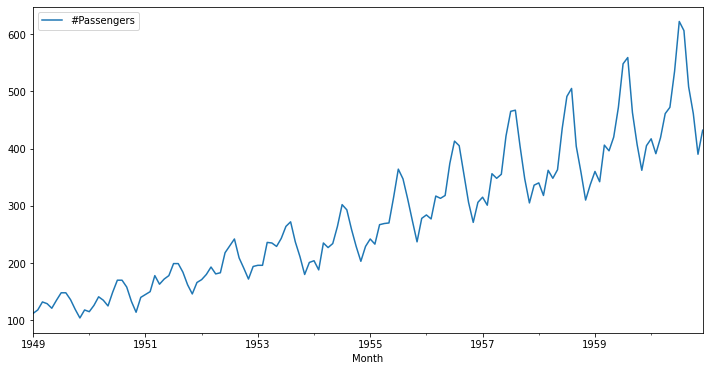

In [18]:

df.plot(figsize=(12,6))

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

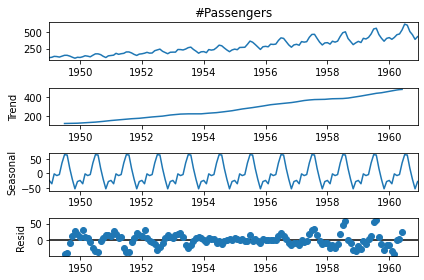

In [20]:
results = seasonal_decompose(df['#Passengers'])
results.plot();
     

In [21]:
len(df)



144

In [22]:
train = df.iloc[:128]
test = df.iloc[128:]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     

In [25]:
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [28]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
     

In [29]:
scaled_train[:10]

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703]])

In [30]:
from keras.preprocessing.sequence import TimeseriesGenerator
     

In [31]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [32]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01758242 0.03076923 0.06153846]
Predict this y: 
 [[0.05494505]]


In [33]:

X.shape

(1, 3, 1)

In [34]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [35]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [36]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
116/116 [==============================] - 2s 7ms/step - loss: 0.0424
Epoch 2/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0125
Epoch 3/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0123
Epoch 4/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0113
Epoch 5/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0098
Epoch 6/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0093
Epoch 7/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 8/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0077
Epoch 9/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0059
Epoch 10/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 11/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 12/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0054
Epoch 13/50
116/116 [====

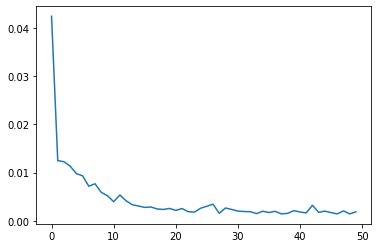

In [39]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
     

In [40]:
last_train_batch = scaled_train[-12:]

In [41]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [42]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 250ms/step


array([[0.86731154]], dtype=float32)

In [43]:
scaled_test[0]

array([0.78901099])

In [44]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [45]:

test_predictions

[array([0.86731154], dtype=float32),
 array([0.702653], dtype=float32),
 array([0.6096728], dtype=float32),
 array([0.62190044], dtype=float32),
 array([0.6465968], dtype=float32),
 array([0.6819975], dtype=float32),
 array([0.7454598], dtype=float32),
 array([0.7823078], dtype=float32),
 array([0.85026205], dtype=float32),
 array([1.0030184], dtype=float32),
 array([1.1766236], dtype=float32),
 array([1.2298061], dtype=float32),
 array([1.0900321], dtype=float32),
 array([0.8759297], dtype=float32),
 array([0.75036275], dtype=float32),
 array([0.728936], dtype=float32)]

In [46]:

test.head()

,#Passengers
Month,
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417


In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [48]:
test['Predictions'] = true_predictions

<ipython-input-48-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


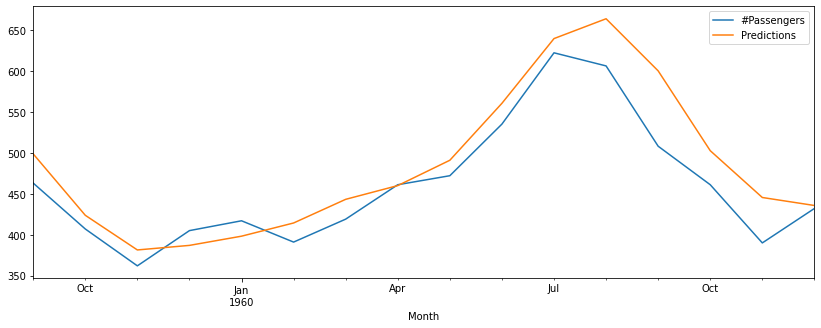

In [49]:
test.plot(figsize=(14,5))

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['#Passengers'],test['Predictions']))
print(rmse)

36.75547187817672
